In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
import os

# Path to your uploaded zip file (adjust if needed)
zip_path = "/content/covertype.zip"
extract_path = "/content/cover_forest"

# Create extraction folder if not exists
os.makedirs(extract_path, exist_ok=True)

# Unzip the dataset
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(f"✅ Dataset extracted to: {extract_path}")

#  list the extracted files and folders
for root, dirs, files in os.walk(extract_path):
    for name in files[:20]:  # show only first 20 files
        print(os.path.join(root, name))


✅ Dataset extracted to: /content/cover_forest
/content/cover_forest/covtype.data.gz
/content/cover_forest/covtype.info
/content/cover_forest/old_covtype.info


In [ ]:
import pandas as pd
import gzip

# Path to the actual dataset file
data_path = "/content/cover_forest/covtype.data.gz"

# Load CSV from gzipped file
df = pd.read_csv(data_path, header=None)

print("✅ Dataset loaded!")
print("Shape:", df.shape)
print("Preview:")
print(df.head())


✅ Dataset loaded!
Shape: (581012, 55)
Preview:
     0    1   2    3    4     5    6    7    8     9   ...  45  46  47  48  \
0  2596   51   3  258    0   510  221  232  148  6279  ...   0   0   0   0   
1  2590   56   2  212   -6   390  220  235  151  6225  ...   0   0   0   0   
2  2804  139   9  268   65  3180  234  238  135  6121  ...   0   0   0   0   
3  2785  155  18  242  118  3090  238  238  122  6211  ...   0   0   0   0   
4  2595   45   2  153   -1   391  220  234  150  6172  ...   0   0   0   0   

   49  50  51  52  53  54  
0   0   0   0   0   0   5  
1   0   0   0   0   0   5  
2   0   0   0   0   0   2  
3   0   0   0   0   0   2  
4   0   0   0   0   0   5  

[5 rows x 55 columns]


In [ ]:
# Path to the info file
info_path = "/content/cover_forest/covtype.info"

# Read and display the file
with open(info_path, "r") as f:
    info_content = f.read()

print(info_content)


The Forest CoverType dataset


1.	Title of Database:

	Forest Covertype data


2.	Sources:

	(a) Original owners of database:
		Remote Sensing and GIS Program
		Department of Forest Sciences
		College of Natural Resources
		Colorado State University
		Fort Collins, CO  80523
		(contact Jock A. Blackard, jblackard 'at' fs.fed.us
		      or Dr. Denis J. Dean, denis.dean 'at' utdallas.edu)

	NOTE:	Reuse of this database is unlimited with retention of 
		copyright notice for Jock A. Blackard and Colorado 
		State University.

	(b) Donors of database:
		Jock A. Blackard (jblackard 'at' fs.fed.us)
		GIS Coordinator
		USFS - Forest Inventory & Analysis
		Rocky Mountain Research Station
		507 25th Street
		Ogden, UT 84401

		Dr. Denis J. Dean (denis.dean 'at' utdallas.edu)
		Professor
		Program in Geography and Geospatial Sciences
		School of Economic, Political and Policy Sciences
		800 West Campbell Rd
		Richardson, TX  75080-3021 
		
		Dr. Charles W. Anderson (anderson 'at' cs.colostate.edu

In [ ]:

# Path to dataset
data_path = "/content/cover_forest/covtype.data.gz"

# 10 quantitative features
quantitative_features = [
    "Elevation", "Aspect", "Slope",
    "Horizontal_Distance_To_Hydrology", "Vertical_Distance_To_Hydrology",
    "Horizontal_Distance_To_Roadways", "Hillshade_9am",
    "Hillshade_Noon", "Hillshade_3pm",
    "Horizontal_Distance_To_Fire_Points"
]

# Wilderness areas (4 binary columns)
wilderness_features = [f"Wilderness_Area_{i}" for i in range(1, 5)]

# Soil types (40 binary columns)
soil_features = [f"Soil_Type_{i}" for i in range(1, 41)]

# Target
target = ["Cover_Type"]

# Combine all column names
columns = quantitative_features + wilderness_features + soil_features + target

# Load dataset
df = pd.read_csv(data_path, header=None, names=columns)

print("✅ Dataset loaded successfully")
print("Shape:", df.shape)
print("\nColumns:", df.columns.tolist()[:15], "...")
print("\nPreview:")
print(df.head())

# Split into features and target
X = df.drop(columns=target)
y = df[target[0]]

print("\nFeatures shape:", X.shape)
print("Target shape:", y.shape)
print("Unique Cover Types:", y.unique())


✅ Dataset loaded successfully
Shape: (581012, 55)

Columns: ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area_1', 'Wilderness_Area_2', 'Wilderness_Area_3', 'Wilderness_Area_4', 'Soil_Type_1'] ...

Preview:
   Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0       2596      51      3                               258   
1       2590      56      2                               212   
2       2804     139      9                               268   
3       2785     155     18                               242   
4       2595      45      2                               153   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   
1                              -6                              390  

Setup and Load Dataset

In [ ]:
# If not already installed (Colab)
!pip -q install xgboost

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (accuracy_score, f1_score, classification_report,
                             confusion_matrix)

from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
import itertools
import time

#  Load Covertype
data_path = "/content/cover_forest/covtype.data.gz"

quantitative_features = [
    "Elevation", "Aspect", "Slope",
    "Horizontal_Distance_To_Hydrology", "Vertical_Distance_To_Hydrology",
    "Horizontal_Distance_To_Roadways", "Hillshade_9am",
    "Hillshade_Noon", "Hillshade_3pm",
    "Horizontal_Distance_To_Fire_Points"
]
wilderness_features = [f"Wilderness_Area_{i}" for i in range(1, 5)]
soil_features = [f"Soil_Type_{i}" for i in range(1, 41)]
target_name = "Cover_Type"

columns = quantitative_features + wilderness_features + soil_features + [target_name]
df = pd.read_csv(data_path, header=None, names=columns)

print("Loaded shape:", df.shape)
print(df.head())


Loaded shape: (581012, 55)
   Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0       2596      51      3                               258   
1       2590      56      2                               212   
2       2804     139      9                               268   
3       2785     155     18                               242   
4       2595      45      2                               153   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   
1                              -6                              390   
2                              65                             3180   
3                             118                             3090   
4                              -1                              391   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0            221             232            148   
1            220             235            151   
2       

Split Data inot Test/Train split and preprocessing

In [ ]:
# Class distribution
print("Class distribution:\n", df[target_name].value_counts().sort_index())

# Split
X = df.drop(columns=[target_name])
y = df[target_name]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

# Preprocess: scale ONLY the 10 quantitative columns
numeric_features = quantitative_features
binary_features = wilderness_features + soil_features  # leave as-is

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("bin", "passthrough", binary_features),
    ],
    remainder="drop"
)

print("X_train shape:", X_train.shape, "X_test shape:", X_test.shape)


Class distribution:
 Cover_Type
1    211840
2    283301
3     35754
4      2747
5      9493
6     17367
7     20510
Name: count, dtype: int64
X_train shape: (464809, 54) X_test shape: (116203, 54)


Confusion Matrix Plot & Evaluation

In [ ]:
def plot_confusion(cm, classes, title="Confusion Matrix"):
    plt.figure(figsize=(6, 5))
    plt.imshow(cm, interpolation='nearest')
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    # Normalize rows
    cm_norm = cm.astype('float') / cm.sum(axis=1, keepdims=True)
    thresh = cm.max() / 2.

    # Add numbers
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        text = f"{cm[i, j]}\n({cm_norm[i, j]:.2f})"
        plt.text(j, i, text,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black",
                 fontsize=8)

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()


def evaluate_model(name, model, X_test, y_test):
    t0 = time.time()
    y_pred = model.predict(X_test)
    dur = time.time() - t0

    acc = accuracy_score(y_test, y_pred)
    f1w = f1_score(y_test, y_pred, average="weighted")
    f1m = f1_score(y_test, y_pred, average="macro")

    print(f"\n{name} — Test Metrics")
    print(f"Accuracy: {acc:.4f}")
    print(f"F1 (weighted): {f1w:.4f}")
    print(f"F1 (macro): {f1m:.4f}")
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    plot_confusion(cm, classes=sorted(y_test.unique()), title=f"{name} — Confusion Matrix")

    return {"name": name, "accuracy": acc, "f1_weighted": f1w, "f1_macro": f1m}


Train Multi-Class Models


RandomForest (baseline) — Test Metrics
Accuracy: 0.9557
F1 (weighted): 0.9555
F1 (macro): 0.9247

Classification Report:
               precision    recall  f1-score   support

           1       0.97      0.94      0.96     42368
           2       0.95      0.98      0.96     56661
           3       0.94      0.96      0.95      7151
           4       0.90      0.84      0.87       549
           5       0.95      0.79      0.86      1899
           6       0.94      0.89      0.91      3473
           7       0.98      0.95      0.96      4102

    accuracy                           0.96    116203
   macro avg       0.94      0.91      0.92    116203
weighted avg       0.96      0.96      0.96    116203



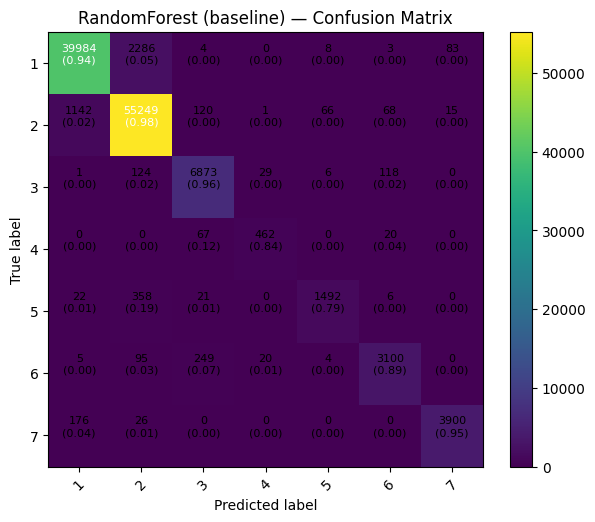

In [ ]:
# Models to Compare:
# Random Forest
# XGBoost

# Random Forest baseline
rf_pipe = Pipeline(steps=[
    ("prep", preprocessor),
    ("clf", RandomForestClassifier(
        n_estimators=300,
        max_depth=None,
        n_jobs=-1,
        class_weight="balanced_subsample",
        random_state=42
    ))
])

rf_pipe.fit(X_train, y_train)
rf_results = evaluate_model("RandomForest (baseline)", rf_pipe, X_test, y_test)








In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
import numpy as np

# Remap labels so they start from 0
y_train_xgb = y_train - y_train.min()
y_test_xgb = y_test - y_train.min()

# Define XGBoost pipeline
xgb_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('xgb', XGBClassifier(
        objective="multi:softmax",     # multi-class classification
        num_class=len(np.unique(y_train_xgb)),  # number of classes
        random_state=42,
        eval_metric="mlogloss"         # remove use_label_encoder (deprecated)
    ))
])

# Fit on remapped labels
xgb_pipe.fit(X_train, y_train_xgb)

# ✅ Corrected evaluation function
def evaluate_model(name, model, X_test, y_test):
    from sklearn.metrics import accuracy_score, f1_score, classification_report
    import pandas as pd

    # Predictions
    y_pred = model.predict(X_test)

    # Metrics
    acc = accuracy_score(y_test, y_pred)
    f1_weighted = f1_score(y_test, y_pred, average="weighted")
    f1_macro = f1_score(y_test, y_pred, average="macro")

    # Print detailed report
    print(f"\n{name} Results")
    print("Accuracy:", round(acc, 4))
    print("Weighted F1:", round(f1_weighted, 4))
    print("Macro F1:", round(f1_macro, 4))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

    # Return results in consistent format
    return {
        "Model": name,
        "Accuracy": acc,
        "F1_Weighted": f1_weighted,
        "F1_Macro": f1_macro
    }


# Evaluate on remapped test labels
xgb_results = evaluate_model("XGBoost (baseline)", xgb_pipe, X_test, y_test_xgb)



XGBoost (baseline) Results
Accuracy: 0.8696
Weighted F1: 0.869
Macro F1: 0.8539

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.84      0.85     42368
           1       0.87      0.90      0.88     56661
           2       0.89      0.91      0.90      7151
           3       0.88      0.86      0.87       549
           4       0.89      0.61      0.72      1899
           5       0.85      0.80      0.82      3473
           6       0.95      0.91      0.93      4102

    accuracy                           0.87    116203
   macro avg       0.88      0.83      0.85    116203
weighted avg       0.87      0.87      0.87    116203



In [ ]:
# Compare Results
print("\n=== Baseline Comparison ===")
summary = pd.DataFrame([rf_results, xgb_results])
print(summary)



=== Baseline Comparison ===
                      name  accuracy  f1_weighted  f1_macro  \
0  RandomForest (baseline)  0.955741     0.955528  0.924696   
1                      NaN       NaN          NaN       NaN   

                Model  Accuracy  F1_Weighted  F1_Macro  
0                 NaN       NaN          NaN       NaN  
1  XGBoost (baseline)  0.869607     0.869023  0.853869  


Evaluate Models
Metrics:

Accuracy

Confusion Matrix

Classification Report

Random Forest Accuracy: 0.9557
              precision    recall  f1-score   support

           1       0.97      0.94      0.96     42368
           2       0.95      0.98      0.96     56661
           3       0.94      0.96      0.95      7151
           4       0.90      0.84      0.87       549
           5       0.95      0.79      0.86      1899
           6       0.94      0.89      0.91      3473
           7       0.98      0.95      0.96      4102

    accuracy                           0.96    116203
   macro avg       0.94      0.91      0.92    116203
weighted avg       0.96      0.96      0.96    116203



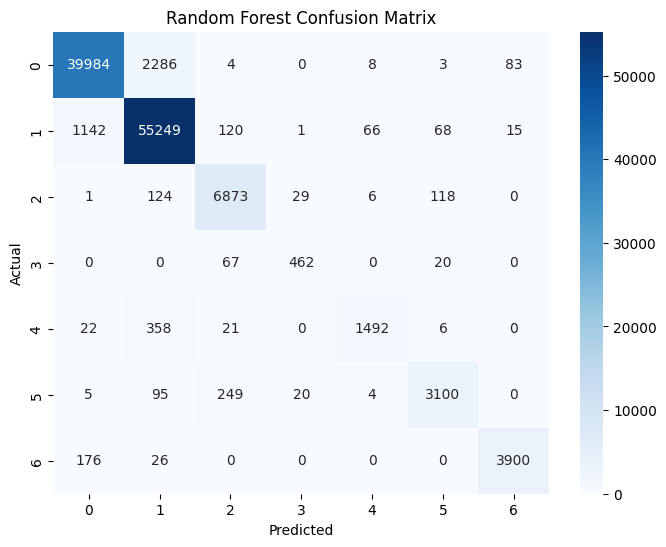

XGBoost Accuracy: 0.0591
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.11      0.15      0.13     42368
           2       0.04      0.00      0.01     56661
           3       0.07      0.01      0.01      7151
           4       0.00      0.00      0.00       549
           5       0.00      0.01      0.00      1899
           6       0.00      0.00      0.00      3473
           7       0.00      0.00      0.00      4102

    accuracy                           0.06    116203
   macro avg       0.03      0.02      0.02    116203
weighted avg       0.06      0.06      0.05    116203



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_

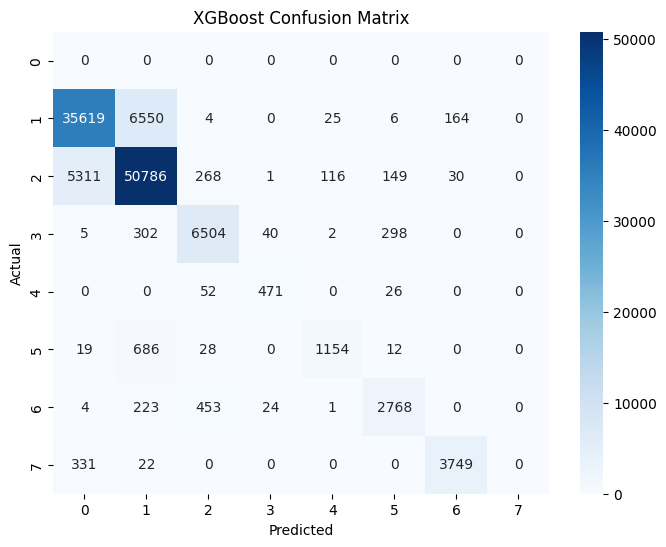

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

def evaluate_model(model, name):
    y_pred = model.predict(X_test)
    print(f"{name} Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6)) # Added figure size for better readability
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Use the correct variable names for the trained models
evaluate_model(rf_pipe, "Random Forest")
evaluate_model(xgb_pipe, "XGBoost")

Feature Importance

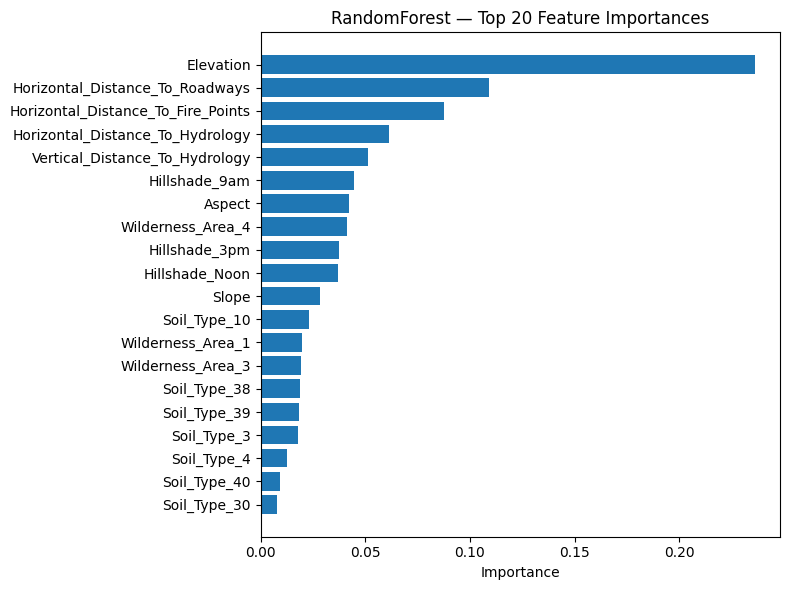

In [ ]:
# Build the final feature name order after preprocessing
final_feature_names = numeric_features + binary_features

def plot_feature_importance(importances, feature_names, top_n=20, title="Feature Importance"):
    idx = np.argsort(importances)[::-1][:top_n]
    plt.figure(figsize=(8, 6))
    plt.barh(range(top_n), importances[idx][::-1])
    plt.yticks(range(top_n), [feature_names[i] for i in idx][::-1])
    plt.title(title)
    plt.xlabel("Importance")
    plt.tight_layout()
    plt.show()

# Random Forest importances
rf_model = rf_pipe.named_steps["clf"]
rf_importances = rf_model.feature_importances_
plot_feature_importance(rf_importances, final_feature_names, top_n=20, title="RandomForest — Top 20 Feature Importances")



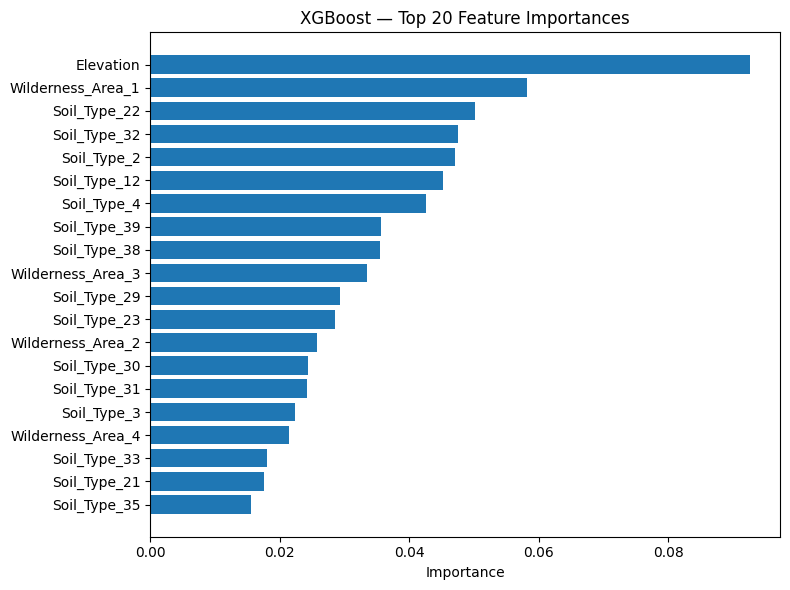

In [ ]:
# XGBoost importances (gain-based by default via feature_importances_)
xgb_model = xgb_pipe.named_steps["xgb"]
xgb_importances = xgb_model.feature_importances_

plot_feature_importance(
    xgb_importances,
    final_feature_names,
    top_n=20,
    title="XGBoost — Top 20 Feature Importances"
)


Hyper Parameter Tunning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

# Define pipeline
pipeline = Pipeline(steps=[
    ("clf", RandomForestClassifier(n_jobs=1, random_state=42))  # RF uses 1 core
])

# Parameter distributions
param_dist = {
    "clf__n_estimators": [100, 300],
    "clf__max_depth": [None, 10, 20],
    "clf__min_samples_split": [2, 5],
    "clf__min_samples_leaf": [1, 2],
}

# Randomized Search with safer settings
rf_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_dist,
    n_iter=5,   # 🔑 fewer candidates
    scoring="f1_macro",
    cv=StratifiedKFold(n_splits=3, shuffle=True, random_state=42),
    verbose=1,
    n_jobs=1,   # 🔑 no parallelism in CV either (stable)
    random_state=42
)

# Fit
rf_search.fit(X_train, y_train)

print("Best Params:", rf_search.best_params_)
print("Best Score:", rf_search.best_score_)


Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best Params: {'clf__n_estimators': 100, 'clf__min_samples_split': 2, 'clf__min_samples_leaf': 1, 'clf__max_depth': None}
Best Score: 0.9118649204931826


In [ ]:
# XGBoost — with Early Stopping
# We’ll tune a few impactful params. Early stopping requires eval_set.
xgb_base = XGBClassifier(
    objective="multi:softprob",
    num_class=7,
    tree_method="hist",
    eval_metric="mlogloss",
    n_jobs=-1,
    random_state=42
)

xgb_search = RandomizedSearchCV(
    estimator=Pipeline(steps=[
        ("prep", preprocessor),
        ("clf", xgb_base)
    ]),
    param_distributions={
        "clf__n_estimators": [300, 500, 800, 1000],
        "clf__learning_rate": [0.05, 0.1, 0.2],
        "clf__max_depth": [6, 8, 10, 12],
        "clf__min_child_weight": [1, 3, 5, 7],
        "clf__subsample": [0.7, 0.8, 0.9, 1.0],
        "clf__colsample_bytree": [0.7, 0.8, 0.9, 1.0],
        "clf__gamma": [0, 0.1, 0.2],
        "clf__reg_lambda": [1, 1.5, 2.0, 3.0],
    },
    n_iter=25,
    scoring="f1_macro",
    cv=StratifiedKFold(n_splits=3, shuffle=True, random_state=42),
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# Fit with early stopping inside the CV splits by wrapping a custom fit_params
# RandomizedSearchCV can't pass fit_params to inner Pipeline steps directly,
# so we'll fit best params again with early stopping after search.
xgb_search.fit(X_train, y_train)
print("Best XGB params:", xgb_search.best_params_)

# Refit best XGB with early stopping on a validation split
best_params = {k.replace("clf__", ""): v for k, v in xgb_search.best_params_.items()}
xgb_best = Pipeline(steps=[
    ("prep", preprocessor),
    ("clf", XGBClassifier(
        objective="multi:softprob",
        num_class=7,
        tree_method="hist",
        eval_metric="mlogloss",
        n_jobs=-1,
        random_state=42,
        **best_params
    ))
])

# Make a small validation slice from train for early stopping
X_tr, X_val, y_tr, y_val = train_test_split(
    X_train, y_train, test_size=0.15, random_state=42, stratify=y_train
)

# Fit with early stopping (we need to reach the classifier inside the pipeline)
xgb_best.named_steps["prep"].fit(X_tr, y_tr)
X_tr_prep = xgb_best.named_steps["prep"].transform(X_tr)
X_val_prep = xgb_best.named_steps["prep"].transform(X_val)

xgb_best.named_steps["clf"].fit(
    X_tr_prep, y_tr,
    eval_set=[(X_val_prep, y_val)],
    early_stopping_rounds=50,
    verbose=False
)

# Evaluate on the test//
# Transform the test using the same preprocessor//
X_test_prep = xgb_best.named_steps["prep"].transform(X_test)
y_pred_best = xgb_best.named_steps["clf"].predict(X_test_prep)

acc = accuracy_score(y_test, y_pred_best)
f1w = f1_score(y_test, y_pred_best, average="weighted")
f1m = f1_score(y_test, y_pred_best, average="macro")
print("\nXGBoost (tuned + early stopping) — Test Metrics")
print(f"Accuracy: {acc:.4f} | F1 (weighted): {f1w:.4f} | F1 (macro): {f1m:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))

cm = confusion_matrix(y_test, y_pred_best)
plot_confusion(cm, classes=sorted(y_test.unique()), title="XGBoost (tuned) — Confusion Matrix")


Side-by-side Comparison

In [ ]:
summary = pd.DataFrame([
    rf_results,
    xgb_results,
    rf_tuned_results,
    {"name": "XGBoost (tuned + ES)", "accuracy": acc, "f1_weighted": f1w, "f1_macro": f1m}
]).sort_values(by="f1_macro", ascending=False).reset_index(drop=True)

print(summary)


My System was crashing due to memory usage so I could not run those two cells above
